# ABU 量化系统  简介（版本 0.1）

* #### __author__ = 'BBFamily'
* ####  __email__ = 'bbfamily@126.com'

## 第六部分 机器学习

In [1]:
import ZEnv
import ZLog
import ZCommonUtil

import numpy as np 
import pandas as pd
pd.options.display.max_columns = 100
%matplotlib inline

## 基本封装库的使用
        
        初始生成一个树回归，一个树分类，
        自动根据y的classes确定使用分离还是回归
        可以生成非监督学习分类器及hmm等
        两个的数据直接生成测试数据，一个比较多，一个少

In [2]:
from MlFiter import MlFiterClass
test_fiter = MlFiterClass.create_test_fiter()
test_fiter_more = MlFiterClass.create_test_more_fiter()

**学习曲线**

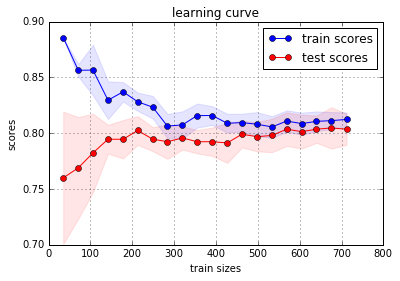

(0.80412095046015697, 0.028989030232112856)

In [12]:
test_fiter_more.estimator.logistic_regression()
test_fiter_more.plot_learning_curve()

**特征权重**

In [5]:
test_fiter.importances_coef_pd()

******************DecisionTreeClassifier******************


,feature,importance
0,x0,0.013333
1,x1,0.013333
2,x2,0.050723
3,x3,0.922611


**树逻辑图**

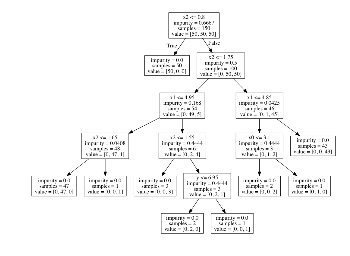

In [9]:
test_fiter.plot_graphviz_tree()
path = ZEnv.shell_cmd_result('pwd') + '/graphviz.png'
!open $path

**混淆矩阵**

[[455  94]
 [ 96 246]]


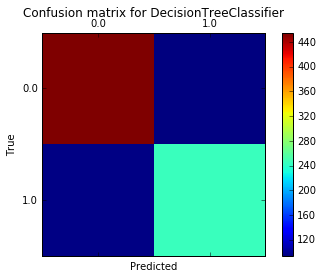

In [11]:
test_fiter_more.plot_confusion_matrices()

**非均衡选择**

scores(self, y_pre, y=None)
accuracy = 0.79
precision_score = 0.71
recall_score = 0.74
             precision    recall  f1-score   support

       loss       0.83      0.82      0.82       549
        win       0.71      0.74      0.73       342

avg / total       0.79      0.79      0.79       891



Confusion Matrix  [[448 101]
 [ 90 252]]
          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 448 | 101 |
Actual   |-----|-----|
       1 |  90 | 252 |
         |-----|-----|


((0.78477792995499907, 448), 0.32857142857142863)

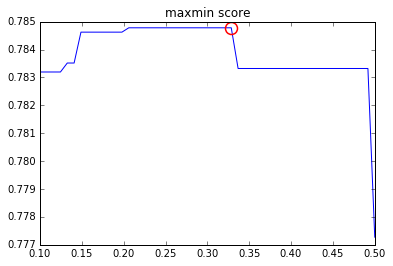

In [13]:
test_fiter_more.prob_maximum_recall_score()

**roc**

DecisionTreeClassifier :roc


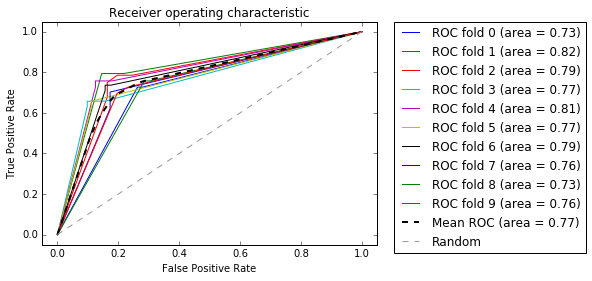

In [8]:
test_fiter_more.plot_roc_estimator()

**特征选择**

In [10]:
test_fiter_more.feature_selection()

RFE selection
             ranking support
SibSp              1    True
Parch              1    True
Cabin_No           1    True
Cabin_Yes          8   False
Embarked_C         2   False
Embarked_Q         7   False
Embarked_S         4   False
Sex_female         1    True
Sex_male           6   False
Pclass_1           5   False
Pclass_2           3   False
Pclass_3           1    True
Age_scaled         1    True
Fare_scaled        1    True

RFECV selection
             ranking support
SibSp              1    True
Parch              1    True
Cabin_No           4   False
Cabin_Yes          1    True
Embarked_C         1    True
Embarked_Q         5   False
Embarked_S         2   False
Sex_female         6   False
Sex_male           1    True
Pclass_1           3   False
Pclass_2           1    True
Pclass_3           1    True
Age_scaled         1    True
Fare_scaled        1    True


**决策边界**

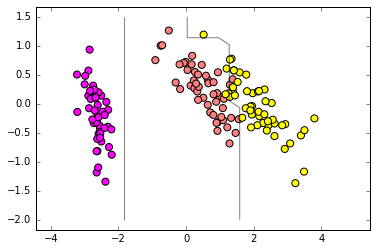

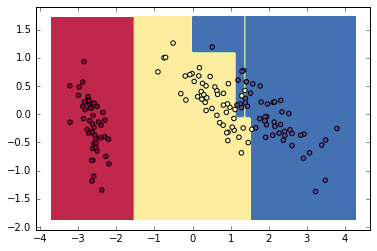

In [11]:
test_fiter.plot_decision_function()

#### 所有接口支持参数直接设置x, y 默认不设置使用内部x， y

In [26]:
test_fiter_more.cross_val_mean_squared_score(x=test_fiter.x, y=test_fiter.y)

mean_squared_error mean: 0.0774596669241


array([-0.        , -0.06666667, -0.        , -0.        , -0.        ,
       -0.06666667, -0.06666667, -0.        , -0.        , -0.        ])

**train test score**

In [19]:
test_fiter_more.cross_val_accuracy_score()

accuracy mean: 0.783592384519


array([ 0.75555556,  0.72222222,  0.73033708,  0.7752809 ,  0.82022472,
        0.7752809 ,  0.83146067,  0.69662921,  0.85393258,  0.875     ])

**切换使用其它学习方法**

In [21]:
test_fiter_more.estimator.adaboost_classifier()
test_fiter_more.cross_val_accuracy_score()

accuracy mean: 0.810433548973


array([ 0.78888889,  0.78888889,  0.78651685,  0.80898876,  0.84269663,
        0.78651685,  0.82022472,  0.82022472,  0.79775281,  0.86363636])

In [22]:
test_fiter_more.estimator.random_forest_classifier(n_estimators=200)
test_fiter_more.cross_val_accuracy_score()

accuracy mean: 0.816000737714


array([ 0.8       ,  0.78888889,  0.7752809 ,  0.85393258,  0.87640449,
        0.82022472,  0.80898876,  0.76404494,  0.84269663,  0.82954545])

In [23]:
test_fiter_more.estimator.svc()
test_fiter_more.cross_val_accuracy_score()

accuracy mean: 0.824927079787


array([ 0.81111111,  0.83333333,  0.78651685,  0.86516854,  0.84269663,
        0.79775281,  0.82022472,  0.79775281,  0.86516854,  0.82954545])

**神经网络相关**

        封装类似sckit风格的接口fit，predict
        普通多层神经网络：
        
        MlFiterTensorFlow:
            基于TensorFlow实现的功能封装：
                    MnnTF：多层神经网络
                    CnnTF: 卷积神经网路
                    KnnTF: TensorFlow实现knn
                    ........

In [56]:
import MlFiterTensorFlow
reload(MlFiterTensorFlow)
from MlFiterTensorFlow import MnnTF
mnn_tf = MlFiterTensorFlow.MnnTF(test_fiter_more.x, test_fiter_more.y)
mnn_tf.fit()
mnn_tf.predict(test_fiter_more.x[100].reshape(1, -1)), test_fiter_more.y[100]

Optimization Finished!


(array([0]), 0.0)

In [55]:
MlFiterTensorFlow.MnnTF.do_tf_tt(test_fiter_more.x, test_fiter_more.y, n_folds=10)

Optimization Finished!
Accuracy:0.722222
Optimization Finished!
Accuracy:0.730337
Optimization Finished!
Accuracy:0.786517
Optimization Finished!
Accuracy:0.786517
Optimization Finished!
Accuracy:0.775281
Optimization Finished!
Accuracy:0.719101
Optimization Finished!
Accuracy:0.696629
Optimization Finished!
Accuracy:0.775281
Optimization Finished!
Accuracy:0.696629
Optimization Finished!
Accuracy:0.786517
acs mean = 0.747503101826


**TensorFlow可视化窗口**

In [120]:
log_proess = MlFiterTensorFlow.show_log_board()

In [119]:
log_proess.kill()

In [117]:
MlFiterTensorFlow.KnnTF.do_tf_tt(test_fiter_more.x, test_fiter_more.y, n_folds=10)

Done!
Accuracy: 0.744444444444
Done!
Accuracy: 0.797752808989
Done!
Accuracy: 0.752808988764
Done!
Accuracy: 0.786516853933
Done!
Accuracy: 0.820224719101
Done!
Accuracy: 0.741573033708
Done!
Accuracy: 0.707865168539
Done!
Accuracy: 0.786516853933
Done!
Accuracy: 0.752808988764
Done!
Accuracy: 0.674157303371


acs mean = 0.756466916355


In [ ]:
import MlFiterSnn

MlFiterSnn        
       非高效多层神经网络实现，便于修改隐含层等参数，做初步测试使用

In [24]:
MlFiterSnn.SnnClass.do_snn_tt(test_fiter_more.x, test_fiter_more.y, n_folds=10, nn_hdim=3)

Done!
Accuracy: 0.777777777778
Done!
Accuracy: 0.797752808989
Done!
Accuracy: 0.797752808989
Done!
Accuracy: 0.775280898876
Done!
Accuracy: 0.707865168539
Done!
Accuracy: 0.76404494382
Done!
Accuracy: 0.831460674157
Done!
Accuracy: 0.85393258427
Done!
Accuracy: 0.786516853933


accuracys mean = 0.79013732834


Done!
Accuracy: 0.808988764045


## 量化结合解决由：


**‘非均衡胜负收益’带来的必然’非均衡胜负比例‘，目标由’因子‘的能力解决一部分，’模式识别‘提升关键的一部分**

In [4]:
from MlFiterDegPd import MlFiterDegPdClass

In [2]:
fn = './data/cache/golden_n6_abu'
key = 'golden_n6_abu'

orders_pd = ZCommonUtil.load_hdf5(fn, key)

In [94]:
import pandas as pd
pd.options.display.max_columns = 100
deg.df.head()

,result,deg_hisWindowPd,deg_windowPd,deg_60WindowPd
2015-07-28,1,-1.256691,3.895622,5.363046
2015-07-28,0,15.908454,4.108007,4.199374
2015-07-28,0,21.175689,3.394158,7.384808
2015-07-28,0,-7.023154,-0.075254,5.413456
2015-07-28,1,11.519025,3.621430,5.765467


In [77]:
deg.x[:5], deg.y[:5]

(array([[ -1.25669051,   3.89562167,   5.36304612],
        [ 15.90845415,   4.10800674,   4.19937422],
        [ 21.17568858,   3.39415774,   7.38480771],
        [ -7.02315417,  -0.07525363,   5.41345634],
        [ 11.51902529,   3.62143029,   5.76546733]]),
 array([ 1.,  0.,  0.,  0.,  1.]))

In [89]:
deg().estimator.svc()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [91]:
deg().cross_val_accuracy_score()

accuracy mean: 0.489222622644


array([ 0.43464707,  0.54241817,  0.51057671,  0.5154754 ,  0.4907593 ,
        0.49988867,  0.43219773,  0.50089087,  0.44365256,  0.52171976])

**0.48的准确率，相当于是乱猜**

        下面使用把数据离散化后，换种分类器测试

In [95]:
deg = MlFiterDegPdClass(orderPd=orders_pd, dummies=True, invoke_hmm=False,
                       invoke_pca=False)

In [96]:
deg.df.head()

,result,"dh_dummies_(-inf, -20]","dh_dummies_(-20, -12]","dh_dummies_(-12, -7]","dh_dummies_(-7, -3]","dh_dummies_(-3, 0]","dh_dummies_(0, 3]","dh_dummies_(3, 7]","dh_dummies_(7, 12]","dh_dummies_(12, 20]","dh_dummies_(20, inf]","dw_dummies_(-inf, -20]","dw_dummies_(-20, -12]","dw_dummies_(-12, -7]","dw_dummies_(-7, -3]","dw_dummies_(-3, 0]","dw_dummies_(0, 3]","dw_dummies_(3, 7]","dw_dummies_(7, 12]","dw_dummies_(12, 20]","dw_dummies_(20, inf]","d60_dummies_(-inf, -20]","d60_dummies_(-20, -12]","d60_dummies_(-12, -7]","d60_dummies_(-7, -3]","d60_dummies_(-3, 0]","d60_dummies_(0, 3]","d60_dummies_(3, 7]","d60_dummies_(7, 12]","d60_dummies_(12, 20]","d60_dummies_(20, inf]"
2015-07-28,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-07-28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-07-28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2015-07-28,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2015-07-28,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**离散值的选择通过统计挖掘**

        MlFiterBinsCs 可视化离散值选择

In [103]:
import MlFiterBinsCs

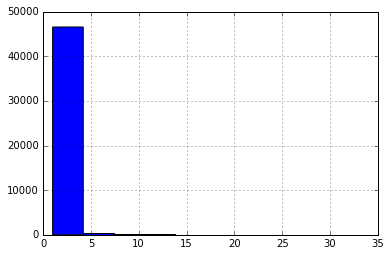

lowBkCnt show hist and qcuts
[1, 3.4]        46126
(3.4, 5.8]        659
(5.8, 8.2]        323
(8.2, 10.6]       101
(10.6, 13]         68
(13, 15.4]         39
(15.4, 17.8]       33
(17.8, 20.2]       18
(20.2, 22.6]        4
(22.6, 33]          3
Name: lowBkCnt, dtype: int64


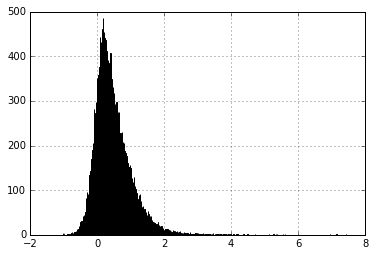

atr_std show hist and qcuts
(1.126, 7.425]          4738
(0.48, 0.63]            4738
(0.151, 0.246]          4738
[-1.000781, -0.0941]    4738
(0.827, 1.126]          4737
(0.63, 0.827]           4737
(0.356, 0.48]           4737
(0.246, 0.356]          4737
(0.0463, 0.151]         4737
(-0.0941, 0.0463]       4737
Name: atr_std, dtype: int64


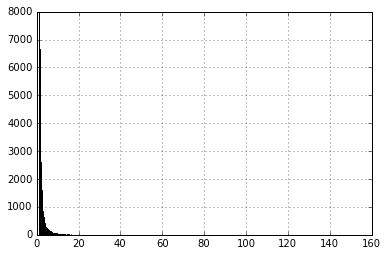

jump_power show hist and qcuts
[0, 1.0776]         11606
(4.343, 151.515]     3995
(1.279, 1.414]       3990
(1.17, 1.279]        3978
(1.585, 1.825]       3975
(1.0776, 1.17]       3974
(1.825, 2.184]       3973
(2.184, 2.814]       3967
(2.814, 4.343]       3966
(1.414, 1.585]       3950
Name: jump_power, dtype: int64


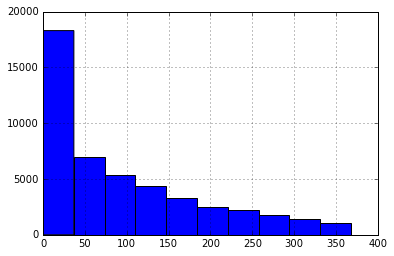

diff_days show hist and qcuts
[0, 36.8]         18297
(36.8, 73.6]       7002
(73.6, 110.4]      5402
(110.4, 147.2]     4358
(147.2, 184]       3373
(184, 220.8]       2397
(220.8, 257.6]     2247
(257.6, 294.4]     1784
(294.4, 331.2]     1439
(331.2, 368]       1075
Name: diff_days, dtype: int64


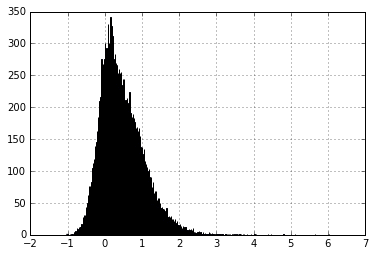

wave_score1 show hist and qcuts
(1.201, 6.0266]      4738
(0.513, 0.693]       4738
(0.108, 0.227]       4738
[-1.0169, -0.174]    4738
(0.901, 1.201]       4737
(0.693, 0.901]       4737
(0.361, 0.513]       4737
(0.227, 0.361]       4737
(-0.0149, 0.108]     4737
(-0.174, -0.0149]    4737
Name: wave_score1, dtype: int64


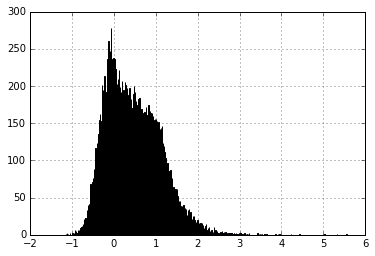

wave_score2 show hist and qcuts
(1.274, 5.558]      4738
(0.564, 0.773]      4738
(0.0137, 0.182]     4738
[-1.122, -0.3]      4738
(0.995, 1.274]      4737
(0.773, 0.995]      4737
(0.367, 0.564]      4737
(0.182, 0.367]      4737
(-0.129, 0.0137]    4737
(-0.3, -0.129]      4737
Name: wave_score2, dtype: int64


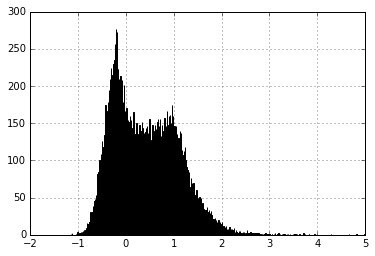

wave_score3 show hist and qcuts
(1.263, 4.992]       4738
(0.56, 0.788]        4738
(-0.0956, 0.0955]    4738
[-1.126, -0.389]     4738
(1.0024, 1.263]      4737
(0.788, 1.0024]      4737
(0.327, 0.56]        4737
(0.0955, 0.327]      4737
(-0.233, -0.0956]    4737
(-0.389, -0.233]     4737
Name: wave_score3, dtype: int64


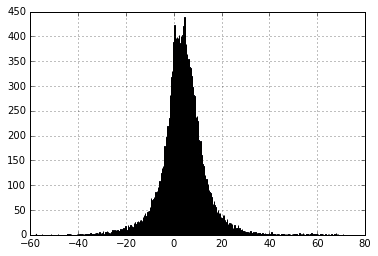

deg_60WindowPd show hist and qcuts
(13.139, 70.936]     4738
(5.101, 6.94]        4738
(0.166, 1.805]       4738
[-57.515, -5.654]    4738
(9.261, 13.139]      4737
(6.94, 9.261]        4737
(3.503, 5.101]       4737
(1.805, 3.503]       4737
(-1.813, 0.166]      4737
(-5.654, -1.813]     4737
Name: deg_60WindowPd, dtype: int64


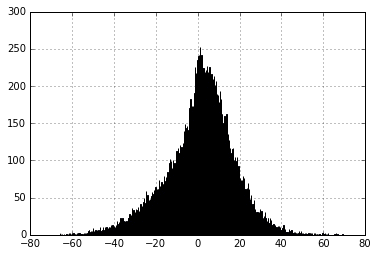

deg_hisWindowPd show hist and qcuts
(19.737, 69.234]      4738
(5.731, 9.188]        4738
(-4.407, -0.456]      4738
[-65.56, -19.177]     4738
(13.376, 19.737]      4737
(9.188, 13.376]       4737
(2.534, 5.731]        4737
(-0.456, 2.534]       4737
(-10.134, -4.407]     4737
(-19.177, -10.134]    4737
Name: deg_hisWindowPd, dtype: int64


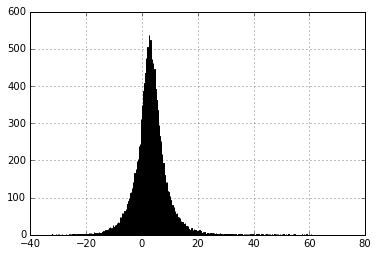

deg_windowPd show hist and qcuts
(9.0906, 60.638]     4738
(3.844, 4.962]       4738
(0.87, 1.938]        4738
[-32.109, -3.288]    4738
(6.486, 9.0906]      4737
(4.962, 6.486]       4737
(2.878, 3.844]       4737
(1.938, 2.878]       4737
(-0.628, 0.87]       4737
(-3.288, -0.628]     4737
Name: deg_windowPd, dtype: int64


In [104]:
MlFiterBinsCs.show_orders_hist(orders_pd)

In [99]:
deg().estimator.random_forest_classifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
deg().cross_val_accuracy_score()

accuracy mean: 0.496905590646


array([ 0.45134714,  0.51458473,  0.50879537,  0.51324872,  0.5092407 ,
        0.5092407 ,  0.45290581,  0.5091314 ,  0.48017817,  0.52038316])

**结果还是乱猜**

用hmm等方式仍然是胡猜，详情见MlFiterDhpPd

自己写的类似adaboost依然效果很差 详情见MlFiterBoost及子类实现代码

通过非均衡概率降低假阳，提高假阴的方式，最后统计所有测试集样本的判别
概率发现其实还瞎猜

In [106]:
MlFiterTensorFlow.MnnTF.do_tf_tt(deg.x, deg.y, n_folds=10)

Optimization Finished!
Accuracy:0.512358
Optimization Finished!
Accuracy:0.515475
Optimization Finished!
Accuracy:0.508573
Optimization Finished!
Accuracy:0.522601
Optimization Finished!
Accuracy:0.511022
Optimization Finished!
Accuracy:0.497885
Optimization Finished!
Accuracy:0.508463
Optimization Finished!
Accuracy:0.501782
Optimization Finished!
Accuracy:0.51314
Optimization Finished!
Accuracy:0.518708
acs mean = 0.511000692844


**神经网络除了慢之外一个德行**

_______

**通过将profit cg qcut 10份分类**

In [18]:
from MlFiter import MlFiterClass
orders_pd.profit_cg.fillna(0, inplace=True)
# order_has_ret = orders_pd[(orders_pd.result <> 0) & (np.isnan(orders_pd.profit_cg))]
order_has_ret = orders_pd[(orders_pd.result <> 0)]
n_class = 100
order_has_ret['class'] = pd.qcut(order_has_ret.profit_cg, n_class, labels=range(0, n_class))
order_has_ret['class'] = order_has_ret['class'].astype(int)
ZLog.info(np.unique(order_has_ret['class']))

deg_pd = order_has_ret.filter(['class', 'result', 'deg_hisWindowPd', 'deg_windowPd', 'deg_60WindowPd'])
train_np = deg_pd.as_matrix()
y = train_np[:, 0]
x = train_np[:, 1:]
deg = MlFiterClass(x, y, deg_pd, force_clf=True)
deg_pd.head()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


,class,result,deg_hisWindowPd,deg_windowPd,deg_60WindowPd
2015-07-28,90,1,-1.256691,3.895622,5.363046
2015-07-28,26,-1,15.908454,4.108007,4.199374
2015-07-28,9,-1,21.175689,3.394158,7.384808
2015-07-28,14,-1,-7.023154,-0.075254,5.413456
2015-07-28,78,1,11.519025,3.621430,5.765467


* y为class train_test_split进行分类
* 使用cv数据集的 predict < class阀值 使用result==0的情况查看概率

In [22]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

deg.estimator.random_forest_classifier()

train_df, cv_df = train_test_split(deg.df, test_size=0.1, random_state=0)

fiter = deg.get_fiter()
fiter.fit(train_df.as_matrix()[:, 2:], train_df.as_matrix()[:, 0])

predictions = fiter.predict(cv_df.as_matrix()[:, 2:])

cv_df['predict'] = predictions
cv_df.head()

,class,result,deg_hisWindowPd,deg_windowPd,deg_60WindowPd,predict
2011-10-14,54,1,7.296329,3.278012,4.534220,76.0
2014-01-06,86,1,19.433193,-3.640280,-1.462732,90.0
2015-03-26,15,-1,15.139860,4.874754,4.723976,9.0
2012-04-05,40,-1,-13.382448,0.568413,2.621964,22.0
2016-03-24,66,1,13.809379,2.636750,-5.007059,4.0


In [24]:
cv_df['predict'].value_counts().sort_index().head(10)

0.0    74
1.0    51
2.0    65
3.0    46
4.0    64
5.0    47
6.0    54
7.0    40
8.0    52
9.0    43
Name: predict, dtype: int64

In [26]:
for threshold in np.arange(0, 10):
    ppv = cv_df[cv_df['predict'] <= threshold].result.value_counts()
    ZLog.info('threshold: {}, ppv: {}'.format(threshold, float(ppv[-1])/ppv.sum()))

threshold: 0, ppv: 0.608108108108
threshold: 1, ppv: 0.568
threshold: 2, ppv: 0.552631578947
threshold: 3, ppv: 0.555084745763
threshold: 4, ppv: 0.57
threshold: 5, ppv: 0.576368876081
threshold: 6, ppv: 0.576059850374
threshold: 7, ppv: 0.555555555556
threshold: 8, ppv: 0.539553752535
threshold: 9, ppv: 0.548507462687


### 稍微有一点提高，但是没有达到0.6，这样的话在trade win high profit & loss low profit的情况下不一定能有所提高

_____________

## 要放弃还是继续寻找解决方案，印钞机怎么会那么容易实现呢，所以一切正常，最后请看
## 解决方案部分